# Atividade 2

Discente: Pedro Siade Ferreira

Docente: Cassio Dener Noronha Vidal

Matrícula: 202004734


Importação de módulos necessários


In [4]:
%matplotlib inline
import cv2 # importa opencv
import numpy as np # importa numpy
import matplotlib.pyplot as plt
import sys
imagem = cv2.imread('lena.png', cv2.IMREAD_GRAYSCALE)



*Código* do histograma disponibilizado


In [2]:
def computa_histograma(img):
    W, H = img.shape # pega largura e altura da imagem
    h = np.zeros(256, np.uint64) # inicializa h, inteiros maiores
    for v in range(0,H): 
        for u in range(0,W):
            i = img[u,v]
            h[i] = h[i]+1   
    return h

<BarContainer object of 256 artists>

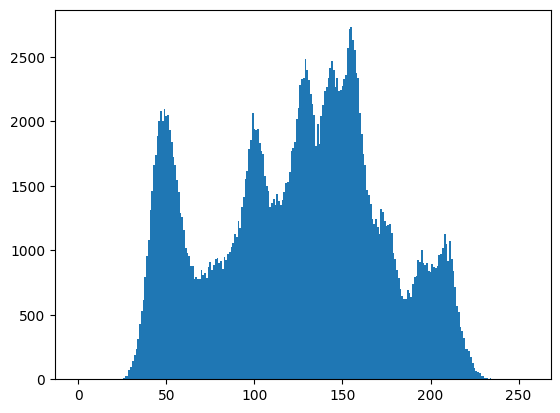

In [5]:
h1=computa_histograma(imagem)
plt.bar(range(0,256), h1, 1)

Utiliza-se o histograma binning a fim de poder representar imagens as quais possuem maior quantidade de bits. Por exemplo, uma imagem de 64 bits tem cerca de 4294967296, oque torna inviável a realização do algoritmo acima para a mesma. A fim de resolver o problema, estabelece-se faixas de bits, diminuindo o intervalo e possibilitar melhor representação.

Exemplo: para uma imagem de 8 bits, ao inves de 256 valores no histograma, pode-se representar em faixas 2 valores, tendo que entre a faixa 0 e 1 nesse histograma representa  0 a 2 bits.


In [8]:
def binning_histograma(img):
    m, n = img.shape    
    h = np.zeros(128, np.uint8)#para um caso geral bastaria alterar o 128(256/n) e definir pixel/n
    for v in range(0,m): 
        for u in range(0,n):
            pixel = img[v,u]
            valor=int(pixel/2)
            h[valor] = h[valor]+1
    return h

def binning_histograma2(img):
    m, n = img.shape    
    h = np.zeros(32, np.uint8)
    for v in range(0,m): 
        for u in range(0,n):
            pixel = img[v,u]
            valor=int(pixel/8)
            h[valor] = h[valor]+1
    return h
    teste = binning_histograma(imagem)
    h2 = binning_histograma2(imagem)


  

<BarContainer object of 32 artists>

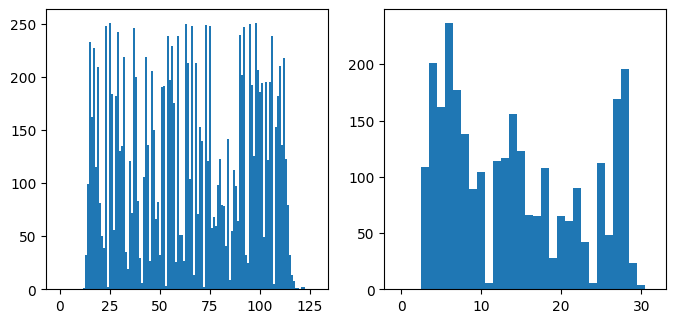

In [9]:
teste = binning_histograma(imagem)
h2 = binning_histograma2(imagem)
fig = plt.figure(figsize=(8,8)) 
linha=2
coluna=2
fig.add_subplot(linha, coluna, 1) 
plt.bar(range(0,128), teste, 1)
fig.add_subplot(linha, coluna, 2) 
plt.bar(range(0,32), h2, 1)





2.Analisando diferentes imagens:



In [10]:
airfield = cv2.imread('airfield-05.tif', cv2.IMREAD_GRAYSCALE)
airfield_SA = cv2.imread('airfield-05small-auto.tif', cv2.IMREAD_GRAYSCALE)
airfield_small = cv2.imread('airfield-05small.tif', cv2.IMREAD_GRAYSCALE)
hist1=computa_histograma(airfield)
hist2=computa_histograma(airfield_SA)
hist3=computa_histograma(airfield_small)

<BarContainer object of 256 artists>

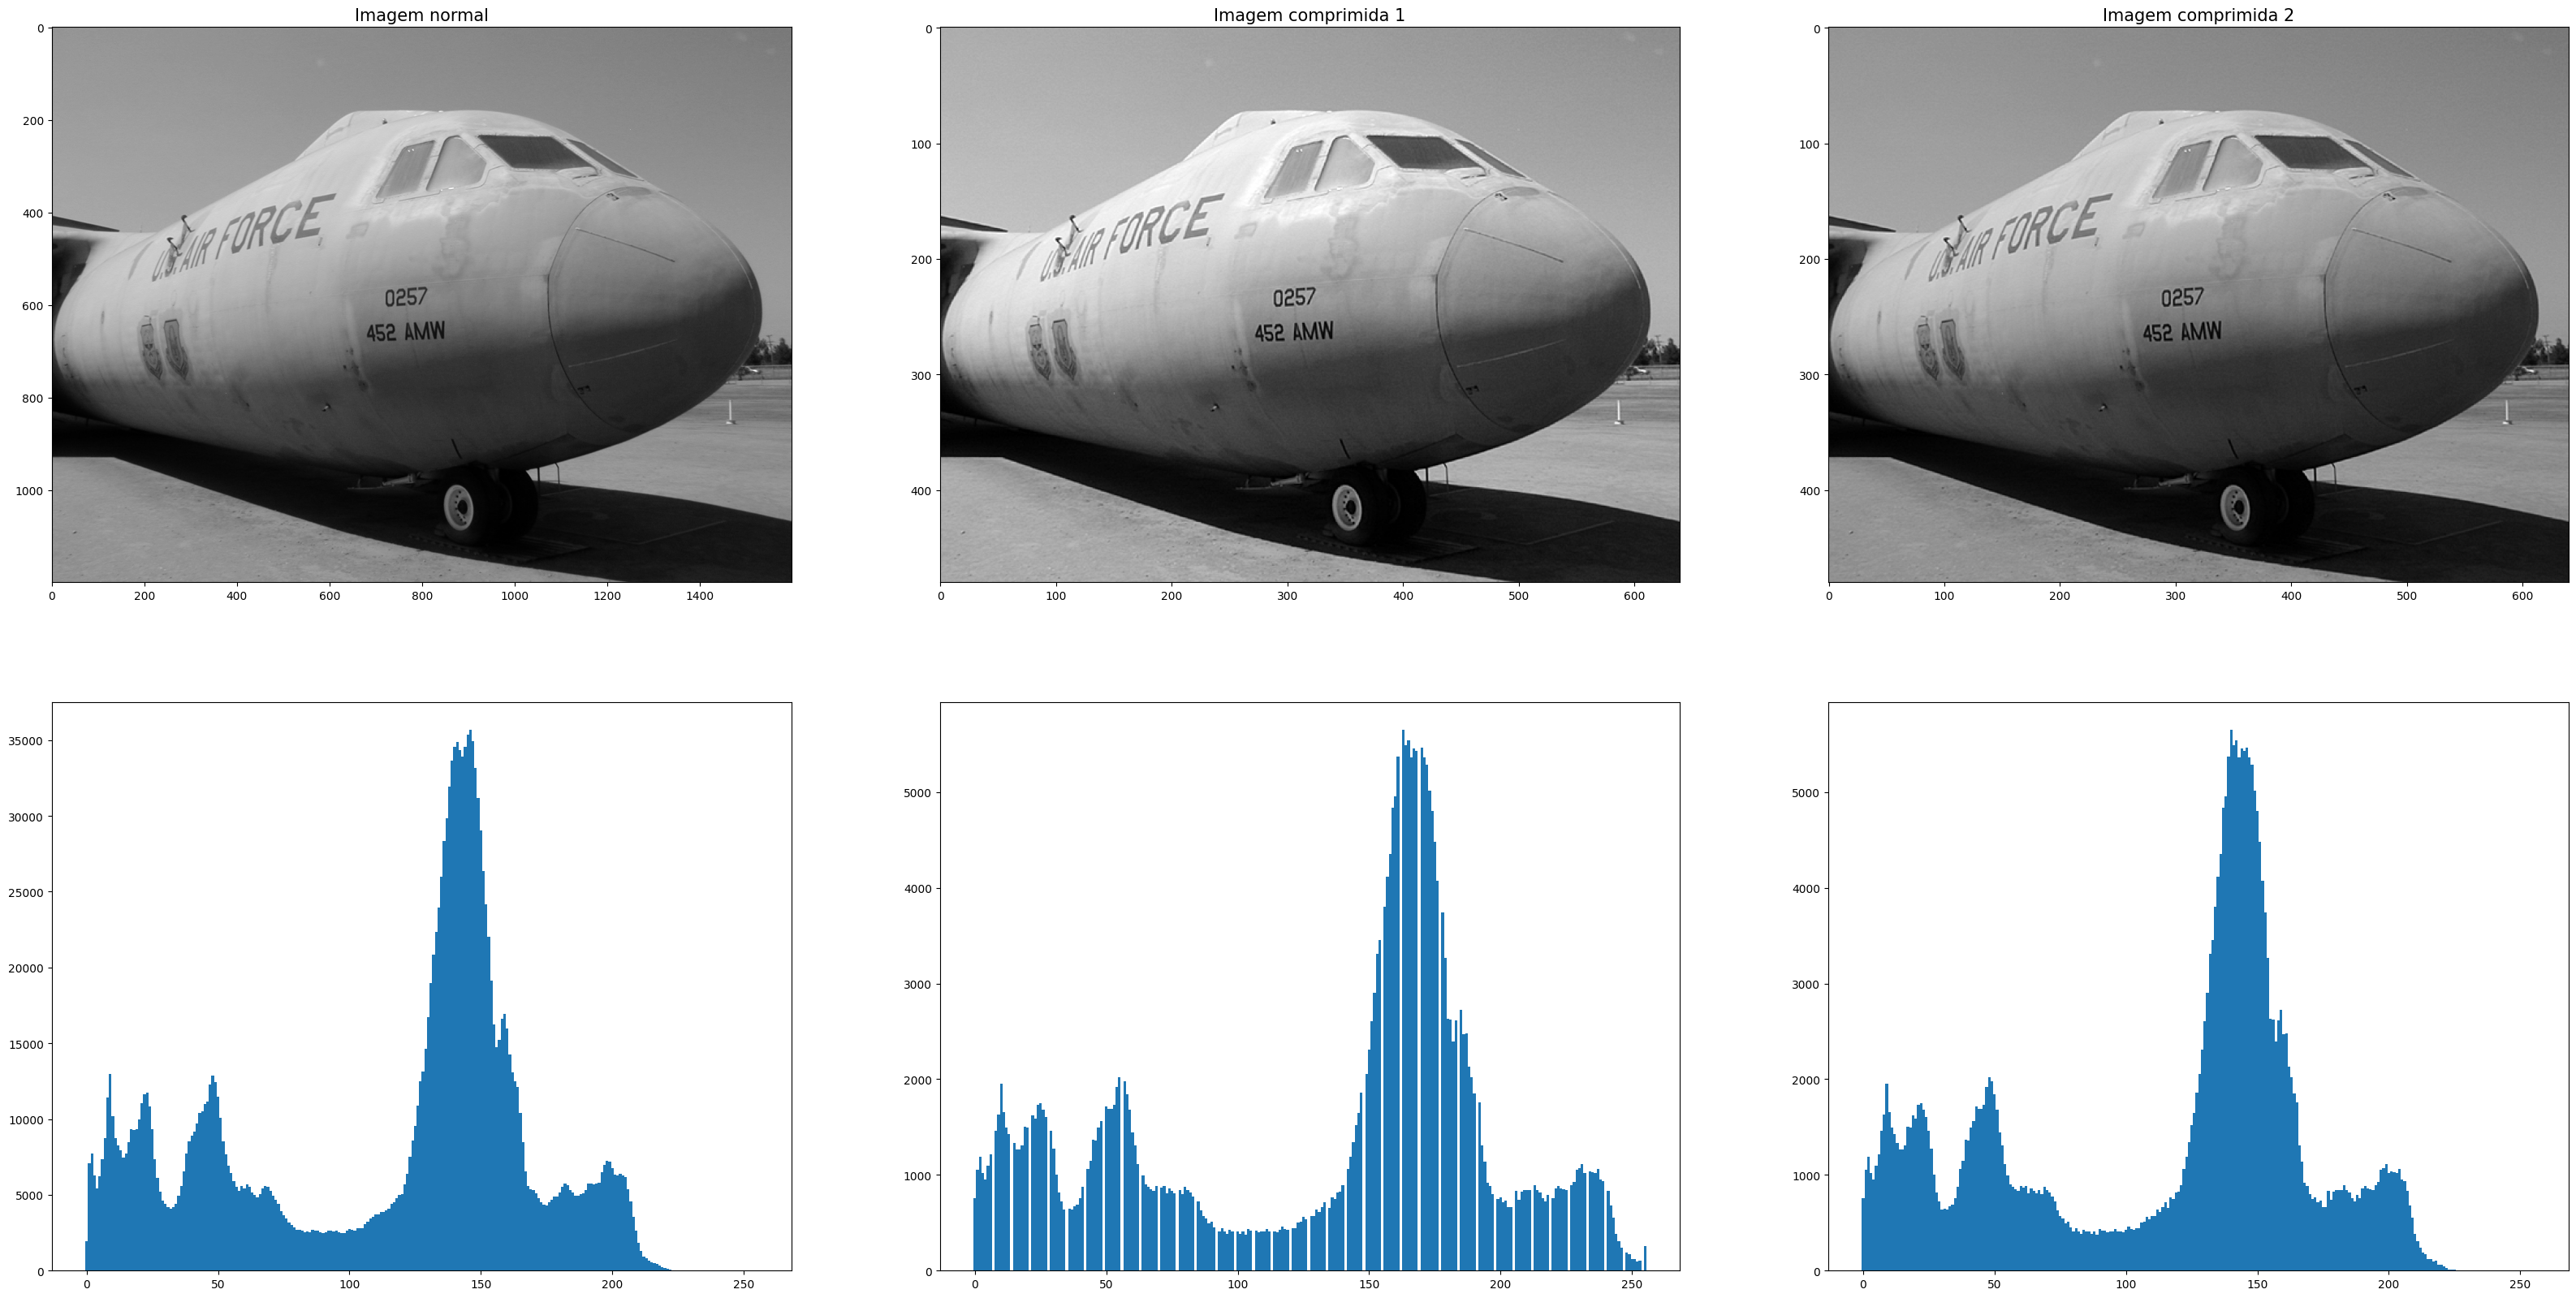

In [11]:
fig, eixo = plt.subplots(2, 3, figsize=(40,20))

eixo[0, 0].set_title('Imagem normal', fontdict={'fontsize': 15})
eixo[0, 1].set_title('Imagem comprimida 1', fontdict={'fontsize': 15})
eixo[0, 2].set_title('Imagem comprimida 2', fontdict={'fontsize': 15})

eixo[0,0].imshow(airfield, cmap='gray')
eixo[0,1].imshow(airfield_SA, cmap='gray')
eixo[0,2].imshow(airfield_small, cmap='gray')

eixo[1,0].bar(range(0, 256),hist1,linewidth=0, width=1)
eixo[1,1].bar(range(0, 256),hist2,linewidth=0, width=1)
eixo[1,2].bar(range(0, 256),hist3,linewidth=0, width=1)

<BarContainer object of 256 artists>

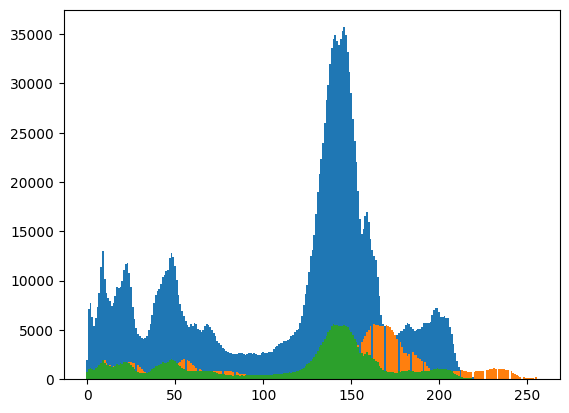

In [12]:
plt.bar(range(0, 256), hist1, linewidth=0, width=1) 
plt.bar(range(0, 256), hist2, linewidth=0, width=1) 
plt.bar(range(0, 256), hist3, linewidth=0, width=1) 

Análise das imagens:

Fazendo uma rapida comparação entre as imagens, percebe-se que há diminuição de tons de cinzas na imagem 2 em comparação com a primeira. Sendo notório que o avião e o céu possuem cor mais uniforme, não havendo tantos níveis intermediários e diminuindo assim os detalhes e diferenciamento de pixels(indicativo de perca)

Análise do histograma:

A primeira diferença perceptível entre os gráficos é a amplitude, já que na primeira há mais de 30.000  pixels com a mesma quantidade de tons de cinza, mas nas outras há no máximo 5000. Logo, pode-se afirmar a existência de uma compreensão da primeira imagem, diminuindo assim a matriz bimendisional a qual representa a mesma e a quantidade de armazenamento necessária.

No segundo histograma há fissuras, oque corresponde á niveis de cinza não detectados na imagem, fugindo do padrão de originalidade. Pois, imagens não manipuladas tendem a ter uma distribuição normal, sem falhas, não havendo 'saltos' entre niveis de cinza diferente e sim uma continuidade.

O terceiro histograma parece ser uma comprensão melhor, não sendo tão perceptivel a manipulação na imagem. Não obstante, se analisarmos o limite superior da curva há pequenas inconsistências, não sendo tão uniforme como o primeiro.

Com todo o citado, pode-se afirmar a possibilidade identificar imagens manipuladas, principalmente analisando as mesmas por histograma, sendo importante reconhecer padrões e distribuições anormais.


3-Formatos de imagens

 

1.   Jpeg: Formato o qual comprimi imagens de maneira eficiente, sendo usado um algoritmo de comprensão com perdas, descartando redudância e detalhes menos importantes. Tem como vantagem ampla compartibilidade e deve ser usado em galerias de fotos, apresentações de slides.


2.   GIF (Graphics Interchange Format) é um formato de arquivo de imagem amplamente utilizado na internet para exibir animações simples e gráficos com poucas cores. Tem como características: paleta de cores limitada em até 256 tons, suporta transparência, usa comprensão sem perdas e permite a realização de sequência de imagens para criar animações(conhecidas como quadro).


3.   PNG (Portable Network Graphics) surgiu como concorrente do GIF e tem como diferencial o suporte para uma maior gama de cores. Mas também, quando comparado com o JPEG exige maior quantidade de armazenamento, no entanto transmite maior detalhamento e possibilita transparencia. Sendo, usado para imagens com alta fidelidade visual, gráficos com elementos textuais e qualquer imagem em que a transparência seja necessária(logotipos)

4.   TIF (Tagged Image File Format) é caracterizado por imagens em alta resolução e qualidade, além de  oferecer opções de compressão flexíveis e de container(armazena JPEGs de menor tamanho). Pode ser usado em aplicações que exigem fidelidade e qualidade visual, como fotografias de alta qualidade e digitalizações de alta resolução, contudo tem como desvantagem o tamanho do arquivo, dificultando compartilhamento e carregamento de sites.

Exibindo os diferentes formatos:








Text(0.5, 1.0, 'Imagem png')

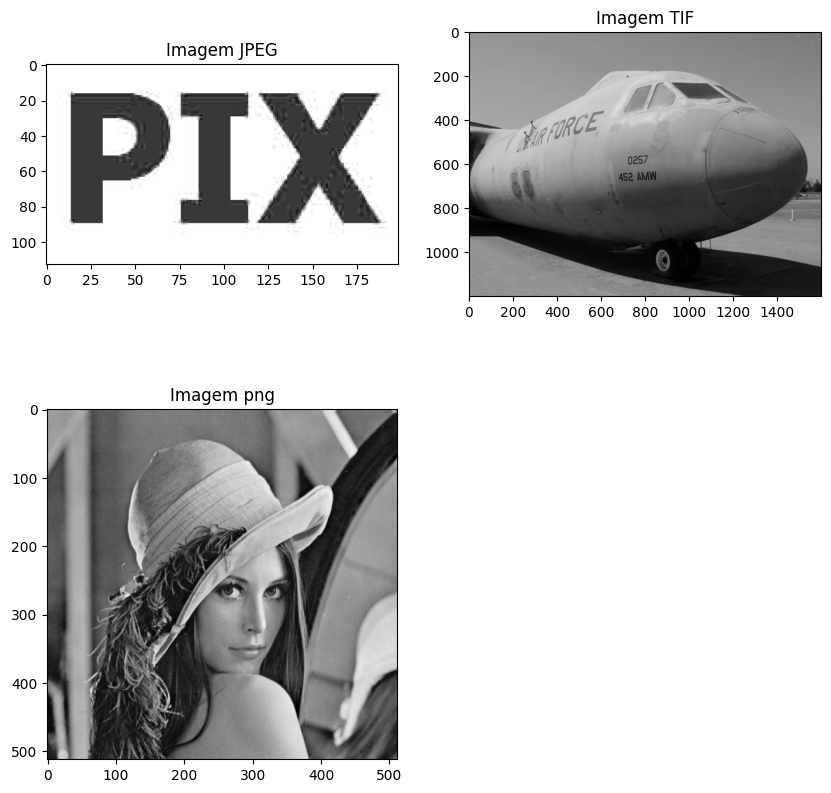

In [15]:
imagem_jpeg= cv2.imread('logo.jpg', cv2.IMREAD_GRAYSCALE)
imagem_tif= cv2.imread('airfield-05.tif', cv2.IMREAD_GRAYSCALE)
imagem_png= cv2.imread('lena.png', cv2.IMREAD_GRAYSCALE)

fig3 = plt.figure(figsize=(10, 10)) 
linha=2
coluna=2
fig3.add_subplot(linha, coluna, 1) 
plt.imshow(imagem_jpeg, cmap='gray')
plt.title("Imagem JPEG") 
fig3.add_subplot(linha, coluna, 2) 
plt.imshow(imagem_tif, cmap='gray')
plt.title("Imagem TIF") 
fig3.add_subplot(linha, coluna, 3) 
plt.imshow(imagem_png, cmap='gray')
plt.title("Imagem png") 

4- Testando imagens com diferentes contraste e realizando analise do histograma das mesmas:



In [13]:
teste1 = cv2.imread('ireland-06-contrastnormal.tif', cv2.IMREAD_GRAYSCALE)
teste2 = cv2.imread('ireland-06-contrasthigh.tif', cv2.IMREAD_GRAYSCALE)
teste3 = cv2.imread('ireland-06-contrastlow.tif', cv2.IMREAD_GRAYSCALE)
teste4 = cv2.imread('ireland-06-dynamicmed64.tif', cv2.IMREAD_GRAYSCALE)
teste5 = cv2.imread('ireland-06-dynamiclow06.tif', cv2.IMREAD_GRAYSCALE)
teste6 = cv2.imread('ireland-06-dynamichigh.tif', cv2.IMREAD_GRAYSCALE)
hist1=computa_histograma(teste1)
hist2=computa_histograma(teste2)
hist3=computa_histograma(teste3)
hist4=computa_histograma(teste4)
hist5=computa_histograma(teste5)
hist6=computa_histograma(teste6)

<BarContainer object of 256 artists>

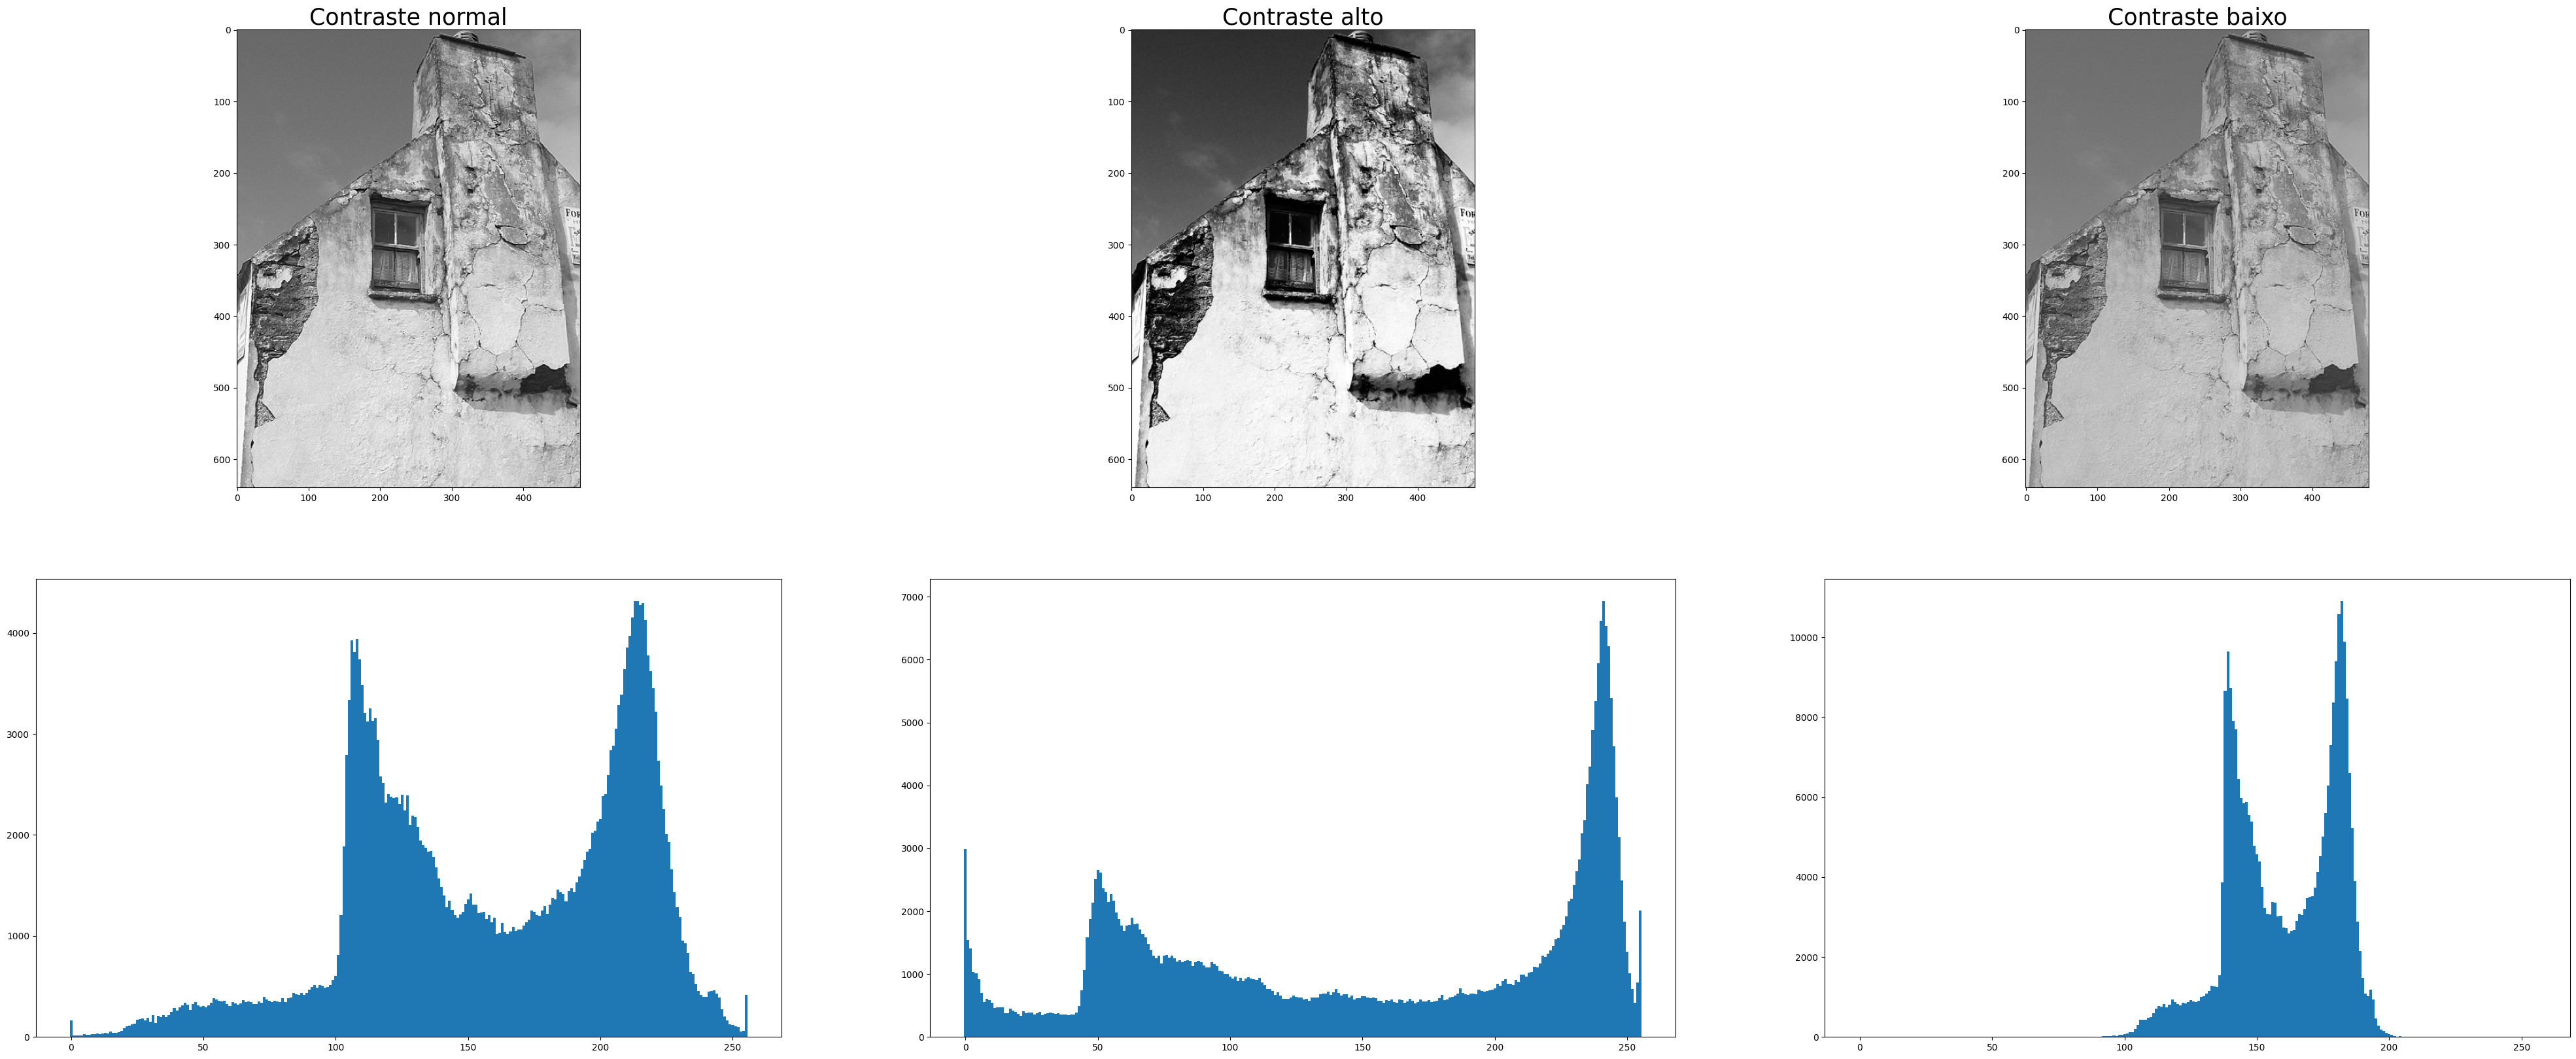

In [16]:
fig, eixo = plt.subplots(2, 3, figsize=(50,20))

eixo[0, 0].set_title('Contraste normal', fontdict={'fontsize': 25})
eixo[0, 1].set_title('Contraste alto', fontdict={'fontsize': 25})
eixo[0, 2].set_title('Contraste baixo', fontdict={'fontsize': 25})

eixo[0,0].imshow(teste1, cmap='gray')
eixo[0,1].imshow(teste2, cmap='gray')
eixo[0,2].imshow(teste3, cmap='gray')

eixo[1,0].bar(range(0, 256),hist1,linewidth=0, width=1)
eixo[1,1].bar(range(0, 256),hist2,linewidth=0, width=1)
eixo[1,2].bar(range(0, 256),hist3,linewidth=0, width=1)

<BarContainer object of 256 artists>

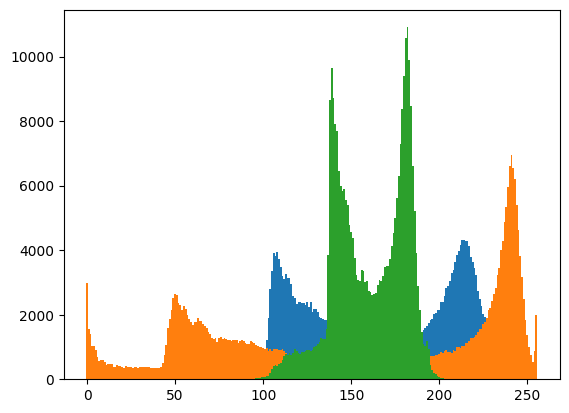

In [17]:
plt.bar(range(0, 256), hist1, linewidth=0, width=1) 
plt.bar(range(0, 256), hist2, linewidth=0, width=1) 
plt.bar(range(0, 256), hist3, linewidth=0, width=1) 




Contraste refere à diferença de intensidades de cinza entre as áreas mais claras e escuras de uma imagem, sendo a distribuição
importante neste processo.

Com as imagens e o histograma acima é possível perceber como a manipulação de contraste influencia no mesmo. Exemplo:

A imagem  de alto contraste(laranja) possuí picos de pixels afastados, há uma grande concentração por volta de 50 e outra em 240. Como também, há presença de ruidos e saturação, diminuindo a qualidade da mesma.

Na segunda, a imagem  de baixo contraste(verde),é  perceptível que os pixels estão menos distribuídos e os 'picos' estão mais proximos(entre 130 e 180), além de serem mais altos quando comparado com a de alto contraste e a normal.Além disso, a analise da imagem é notório a perca de detalhes, porquê regiões diferentes são representadas pelo mesmo tom de cinza.

A imagem normal aparece como um intermediário, preechendo grande parte da faixa dinâmica, tendo uma distribuição mais equilibrada.



<BarContainer object of 256 artists>

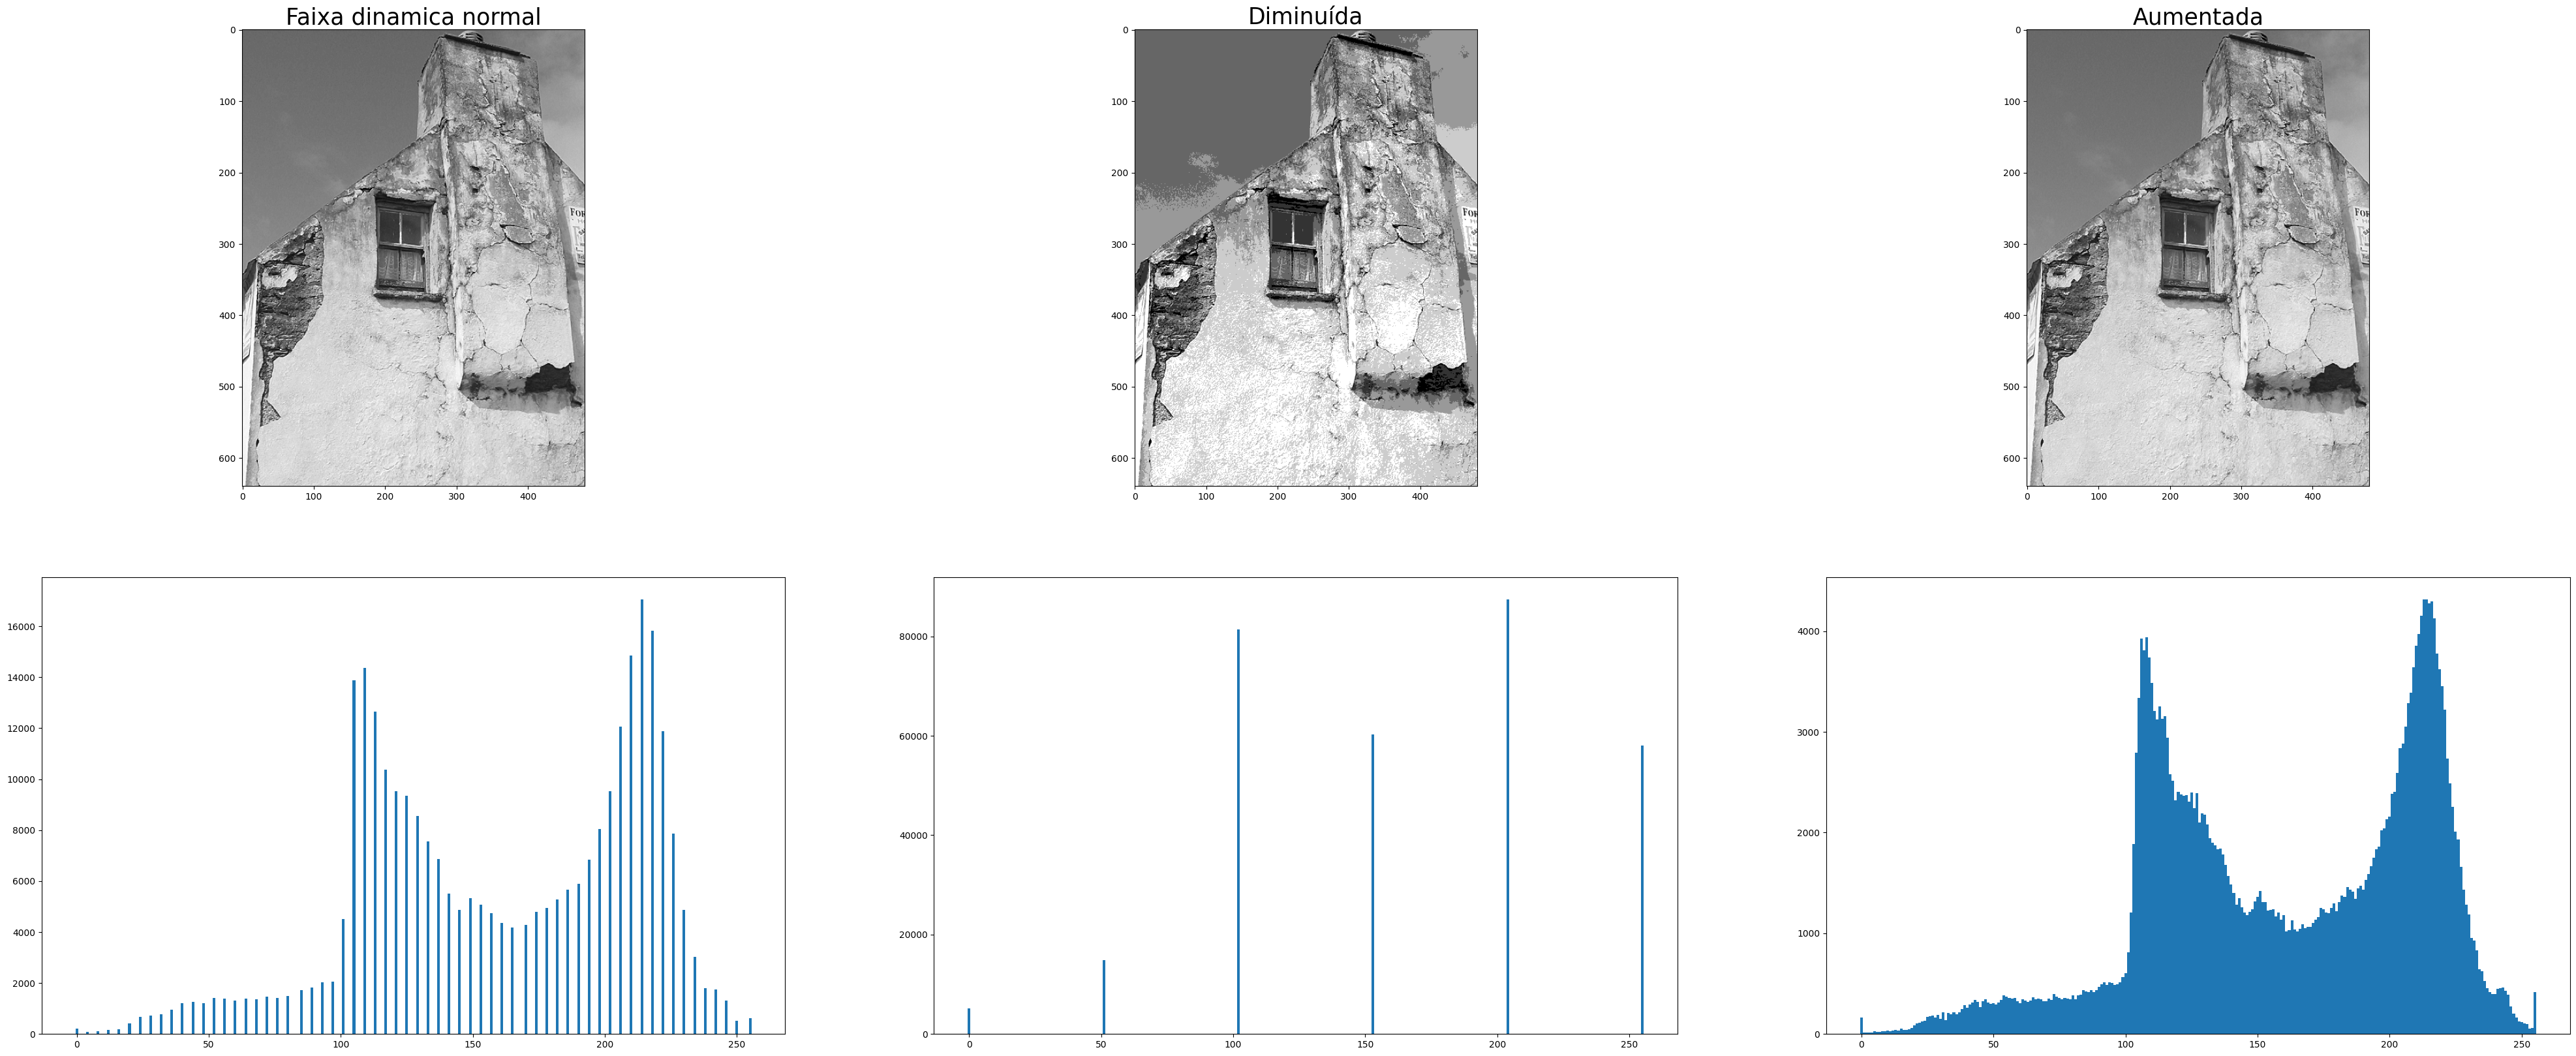

In [18]:
fig, eixo = plt.subplots(2, 3, figsize=(50,20))

eixo[0, 0].set_title('Faixa dinamica normal', fontdict={'fontsize': 25})
eixo[0, 2].set_title('Aumentada', fontdict={'fontsize': 25})
eixo[0, 1].set_title('Diminuída', fontdict={'fontsize': 25})

eixo[0,0].imshow(teste4, cmap='gray')
eixo[0,1].imshow(teste5, cmap='gray')
eixo[0,2].imshow(teste6, cmap='gray')

eixo[1,0].bar(range(0, 256),hist4,linewidth=0, width=1)
eixo[1,1].bar(range(0, 256),hist5,linewidth=0, width=1)
eixo[1,2].bar(range(0, 256),hist6,linewidth=0, width=1)





Faixa dinâmica refere-se a capacidade de capturar, exibir uma ampla gama de intensidades(tons de cinza). Como também, é representada no eixo 'x' do histograma, e quanto maior a diferença entre o maior e o menor valor, por conseguinte maior deve ser a faixa dinâmica(considerar também os níveis intermediários)

Um problema de se ter uma baixa faixa dinâmica é a representação de diferente regiões pela a mesma intensidade na imagem, oque pode acarretar na diminuição de detalhes e prejudicar a percepção da mesma. Dessa forma, a segunda imagem é um exemplo do citado, há apenas seis intensidades diferentes, tornando a passagem entre tons diferentes abrupta, pois não há níveis intermediários.

No entanto, a ultima imagem representa o contrário, porquê possuí uma faixa dinâmica ampla cobrindo todo o eixo x, significando a existência de uma grande quantidade de tons de cinzas diferentes representados na imagem. Uma vantagem do citado, é a possíbilidade de diferenciar detalhes mínimos e ter uma melhor percepção de regiões diferentes em fotografias.

Alem do citado, é importante ressaltar que é possível diminuir a faixa dinâmica intencionamente, ocasionando perdas de qualidade, mas ajudando na diminuição do arquivo e não prejudicando tanto a análise da imagem(oque é notado na imagem 1 em comparação com a imagem 3), dependendo do que será analisado e como foi feito o processo citado.

Sendo assim, tanto quanto a faixa dinâmica e o contraste ideias são determinadas pelas características e requisitos da imagem.



5. Análise com outras funções de histograma:



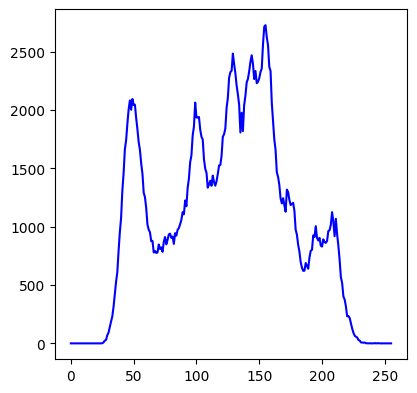

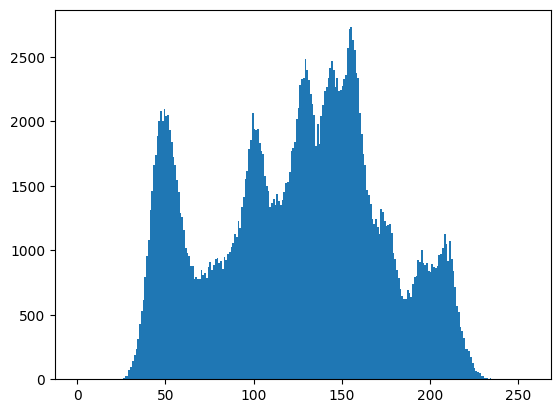

In [ ]:
imagem = cv2.imread('lena.png', cv2.IMREAD_GRAYSCALE)


fig3 = plt.figure(figsize=(10, 10)) 
linha=2
coluna=2
fig3.add_subplot(linha, coluna, 1) 
histograma = cv2.calcHist([imagem], [0], None, [256], [0, 256])
plt.plot(histograma, color='blue')
plt.show()
fig3.add_subplot(linha, coluna, 2) 
plt.hist (imagem.ravel(), 256, [0,256]) 
plt.show()


Comparando com o histograma feito no inicio, não há diferenças perceptíveis, demonstrando que tivemos exito na realização do mesmo.